### Tutorial: Regions and Parcellations

This tutorial demonstrates how to plot brain regions.

Regions and parcellations can be plotted with brainplot as one or more layers, and it’s possible to add region outlines by simply adding a layer with the as_outline parameter.

from https://surfplot.readthedocs.io/en/latest/auto_examples/plot_tutorial_06.html

In [64]:
from neuromaps.datasets import fetch_fslr
from surfplot import Plot
from brainspace.datasets import load_parcellation

Multiple brain regions can be plotted as a single layer as long as the vertices in different regions have different numerical labels/values, which is typical for any parcelation. To demonstrate, we can use the load_parcellation() from Brainspace to load the Schaefer 400 parcellation.
https://github.com/ThomasYeoLab/CBIG/tree/master/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal

In [67]:
surfaces = fetch_fslr()
lh, rh = surfaces['inflated']
p = Plot(lh, rh)

/var/folders/f1/lbplx6md6lbd_7v4zwvm7tbm0000gp/T/ipykernel_1659/599600871.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


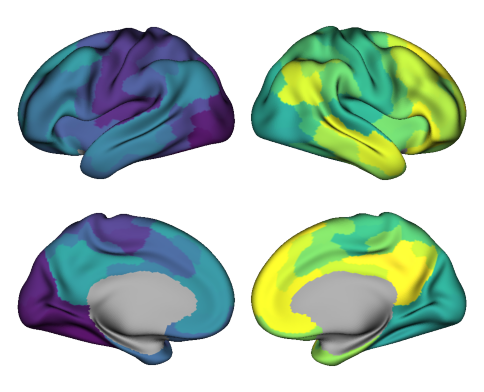

In [19]:
# add schaefer parcellation (no color bar needed)
lh_parc, rh_parc = load_parcellation('schaefer')
p.add_layer({'left': lh_parc, 'right': rh_parc}, cbar=False)

fig = p.build()
fig.show()

Now can add a second layer of just the region outlines. This is done by setting as_outline=True. The color of the outlines are set by the cmap parameter, as with any data. To show black outlines, we can just use the gray colormap.

/var/folders/f1/lbplx6md6lbd_7v4zwvm7tbm0000gp/T/ipykernel_1659/3103300799.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


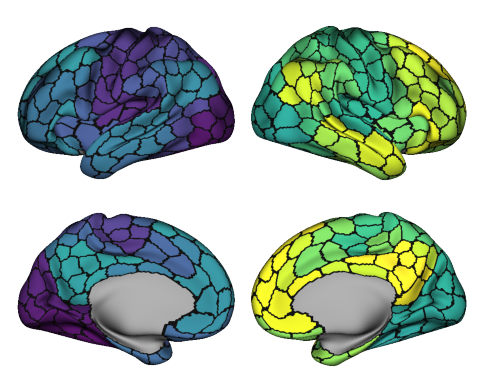

In [20]:
p.add_layer({'left': lh_parc, 'right': rh_parc}, cmap='gray',
            as_outline=True, cbar=False)
fig = p.build()
fig.show()

### Regions of interest

Often times we want to show a selection of regions, instead of all regions. These could be regions from a parcellation, regions defined from a functional localizer, etc.

Let’s select two regions from the Schaefer parcellation and zero-out the remaining regions. We’ll just stick with the left hemisphere here.

In [ ]:
import numpy as np
region_numbers_ns = [114, 233, 180, 420, 117, 331, 79, 258, 116, 271, 351, 339, 56, 253, 141, 298, 388, 107, 192, 1]
# zero-out all regions except 71 and 72
regions = np.where(np.isin(lh_parc, region_numbers_ns), lh_parc, 0)

Although we can use a pre-defined color map, we might want to define a custom colormap where we can define the exact color for each region. This is possible using matplotlib:

In [48]:
from matplotlib.colors import ListedColormap

colors = ['orange', 'steelblue']
cmap = ListedColormap(colors, 'regions', N=20)


Now we can plot both regions with their outlines: only need to show the left lateral view

/var/folders/f1/lbplx6md6lbd_7v4zwvm7tbm0000gp/T/ipykernel_1659/3225520652.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


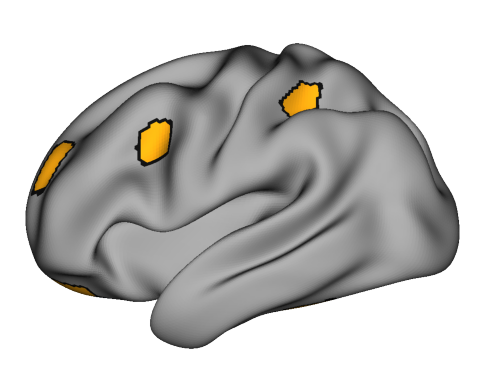

In [53]:
p = Plot(lh, views='lateral')
p.add_layer(regions, cmap=cmap, cbar=False)
p.add_layer(regions, cmap='gray', as_outline=True, cbar=False)

fig = p.build()
fig.show()
# sphinx_gallery_thumbnail_number = 3

/var/folders/f1/lbplx6md6lbd_7v4zwvm7tbm0000gp/T/ipykernel_1659/198412217.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


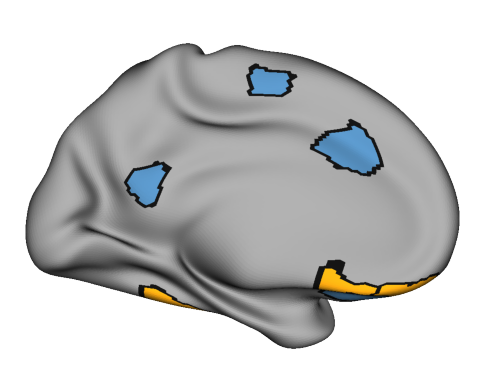

In [54]:
p = Plot(lh, views='medial')
p.add_layer(regions, cmap=cmap, cbar=False)
p.add_layer(regions, cmap='gray', as_outline=True, cbar=False)

fig = p.build()
fig.show()
# sphinx_gallery_thumbnail_number = 3

/var/folders/f1/lbplx6md6lbd_7v4zwvm7tbm0000gp/T/ipykernel_1659/3212953327.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


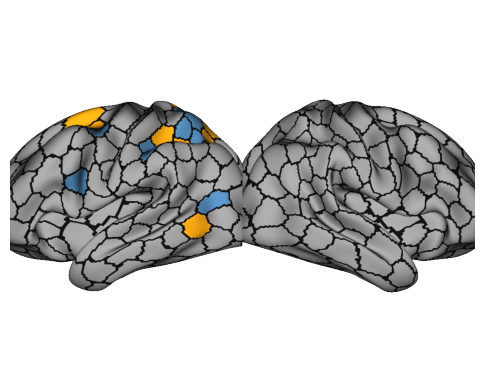

In [ ]:
import numpy as np
from neuromaps.datasets import fetch_fslr
from surfplot import Plot
from brainspace.datasets import load_parcellation
from matplotlib.colors import ListedColormap

# Load surfaces
surfaces = fetch_fslr()
lh, rh = surfaces['inflated']

# Load Schaefer parcellation for both hemispheres
lh_parc, rh_parc = load_parcellation('schaefer')

# Define region numbers of interest
region_numbers_ns = [71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
                     81, 82, 83, 84, 85, 86, 87, 88, 89, 90]  # Example

# Zero out regions not in list — separately for each hemisphere
lh_regions = np.where(np.isin(lh_parc, region_numbers_ns), lh_parc, 0)
rh_regions = np.where(np.isin(rh_parc, region_numbers_ns), rh_parc, 0)

# Define custom colors
colors = ['orange', 'steelblue'] * 10  # Extend or customize as needed
cmap = ListedColormap(colors, 'regions', N=len(colors))

# Plot both hemispheres
p = Plot(lh, rh, views='lateral')

# Add the selected regions with colors
p.add_layer({'left': lh_regions, 'right': rh_regions}, cmap=cmap, cbar=False)

# Add outlines using the full parcellation (not masked!)
p.add_layer({'left': lh_parc, 'right': rh_parc}, cmap='gray', as_outline=True, cbar=False)

# Show the plot
fig = p.build()
fig.show()



/var/folders/f1/lbplx6md6lbd_7v4zwvm7tbm0000gp/T/ipykernel_1659/200666414.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


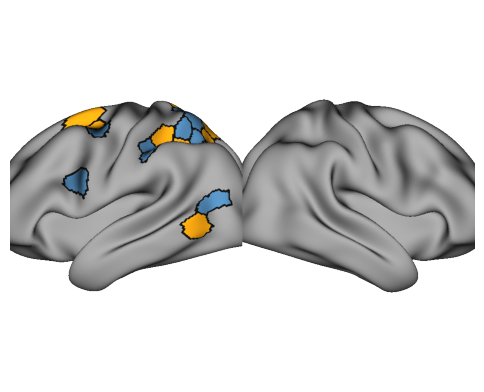

In [70]:
import numpy as np
from neuromaps.datasets import fetch_fslr
from surfplot import Plot
from brainspace.datasets import load_parcellation
from matplotlib.colors import ListedColormap

# Load surfaces
surfaces = fetch_fslr()
lh, rh = surfaces['inflated']

# Load Schaefer parcellation for both hemispheres
lh_parc, rh_parc = load_parcellation('schaefer')

# Define region numbers of interest
region_numbers_ns = [71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
                     81, 82, 83, 84, 85, 86, 87, 88, 89, 90]  # Example

# Zero out regions not in list — separately for each hemisphere
lh_regions = np.where(np.isin(lh_parc, region_numbers_ns), lh_parc, 0)
rh_regions = np.where(np.isin(rh_parc, region_numbers_ns), rh_parc, 0)

# Define custom colors
colors = ['orange', 'steelblue'] * 10  # Extend or customize as needed
cmap = ListedColormap(colors, 'regions', N=len(colors))

# Create plot with both hemispheres
p = Plot(lh, rh, views='lateral')
p.add_layer({'left': lh_regions, 'right': rh_regions}, cmap=cmap, cbar=False)
p.add_layer({'left': lh_regions, 'right': rh_regions}, cmap='gray', as_outline=True, cbar=False)

# Show plot
fig = p.build()
fig.show()

/var/folders/f1/lbplx6md6lbd_7v4zwvm7tbm0000gp/T/ipykernel_1659/2984915014.py:51: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


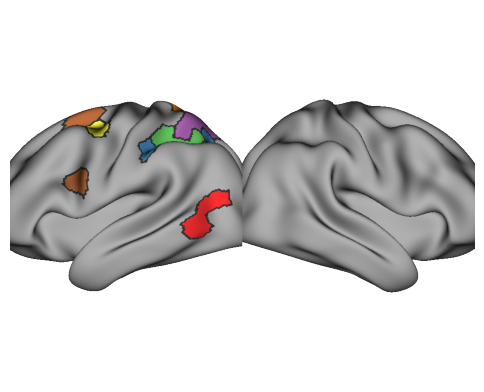

In [ ]:
import numpy as np
from neuromaps.datasets import fetch_fslr
from surfplot import Plot
from brainspace.datasets import load_parcellation
from matplotlib.colors import ListedColormap

# Load surfaces
surfaces = fetch_fslr()
lh, rh = surfaces['inflated']

# Load Schaefer parcellation for both hemispheres
lh_parc, rh_parc = load_parcellation('schaefer')

# Example region numbers of interest (20 regions)
region_numbers_ns = [114, 233, 180, 420, 117, 331, 79, 258, 116, 271, 
                     351, 339, 56, 253, 141, 298, 388, 107, 192, 1]

# Define group assignments for each region number (7 groups)
# For example, assign groups in blocks or however you want:
region_to_group = {
    114, 233, 180, 
    420, 117, 331, 
    79, 258, 116, 
    271, 351, 339, 
    56, 253, 141, 
    298, 388, 107, 
    192, 1
}

# Function to map region number to group, zero otherwise
def map_to_group(parc):
    mapped = np.zeros_like(parc)
    for region_num, group_num in region_to_group.items():
        mapped[parc == region_num] = group_num
    return mapped

lh_groups = map_to_group(lh_parc)
rh_groups = map_to_group(rh_parc)

# Define 7 distinct colors for the groups
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628']
cmap = ListedColormap(colors)

# Create plot with both hemispheres
p = Plot(lh, rh, views='lateral')
p.add_layer({'left': lh_groups, 'right': rh_groups}, cmap=cmap, cbar=False)
p.add_layer({'left': lh_groups, 'right': rh_groups}, cmap='gray', as_outline=True, cbar=False)

# Show plot
fig = p.build()
fig.show()


In [ ]:
import numpy as np
from neuromaps.datasets import fetch_fslr
from surfplot import Plot
from brainspace.datasets import load_parcellation
from matplotlib.colors import ListedColormap

# Load surfaces
surfaces = fetch_fslr()
lh, rh = surfaces['inflated']

# Load Schaefer parcellation for both hemispheres
lh_parc, rh_parc = load_parcellation('schaefer')

# Read group assignments from CSV
region_to_group = {}
with open('region_group_mapping.txt', 'r') as f: #### EDIT HERE TO FILE INCLUDING THE NETWORK CLASSIFICATION
    for line in f:
        region, group = line.strip().split()
        region_to_group[int(region)] = int(group)

# Function to map region number to group, zero otherwise
def map_to_group(parc):
    mapped = np.zeros_like(parc)
    for region_num, group_num in region_to_group.items():
        mapped[parc == region_num] = group_num
    return mapped

lh_groups = map_to_group(lh_parc)
rh_groups = map_to_group(rh_parc)

# Define 7 distinct colors for the groups
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628']
cmap = ListedColormap(colors)

# Create plot with both hemispheres
p = Plot(lh, rh, views='lateral')
p.add_layer({'left': lh_groups, 'right': rh_groups}, cmap=cmap, cbar=False)
p.add_layer({'left': lh_groups, 'right': rh_groups}, cmap='gray', as_outline=True, cbar=False)

# Show plot
fig = p.build()
fig.show()